# CLASS SESSION GROUP ASSIGNMENT

Use the provided dataset ([Assignment1_Cars-1.xlsx](Assignment1_Cars-1.xlsx)) to answer the following questions:

> 1. Does the dataset have any missing information?
> 2. Does the dataset have any outliers?
> 3. Which of the variables within the dataset are not normally distributed?
> 4. Show the descriptive statistics of all the continuous variables within the dataset.

#### Group Members:
1. Kasasira Joshua
2. Racheal Econia
3. Nampijja Betty 
4. Katende Nesta Paul
5. 

In [74]:
# Install the likely missing packages. Run this script from the command line.

# pip install seaborn
# pip install scipy

In [64]:
# Import all packages and specify that graphs be placed inline.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sb

%matplotlib inline

In [65]:
# Load the dataset
dataset = pd.read_excel("Assignment1_Cars-1.xlsx")

### 1. Check for missing information

In [66]:
# 
missing_info = dataset.isnull().sum()
missing_info

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

> **Answer**: No missing values found in the dataset

### 2. Check for outliers

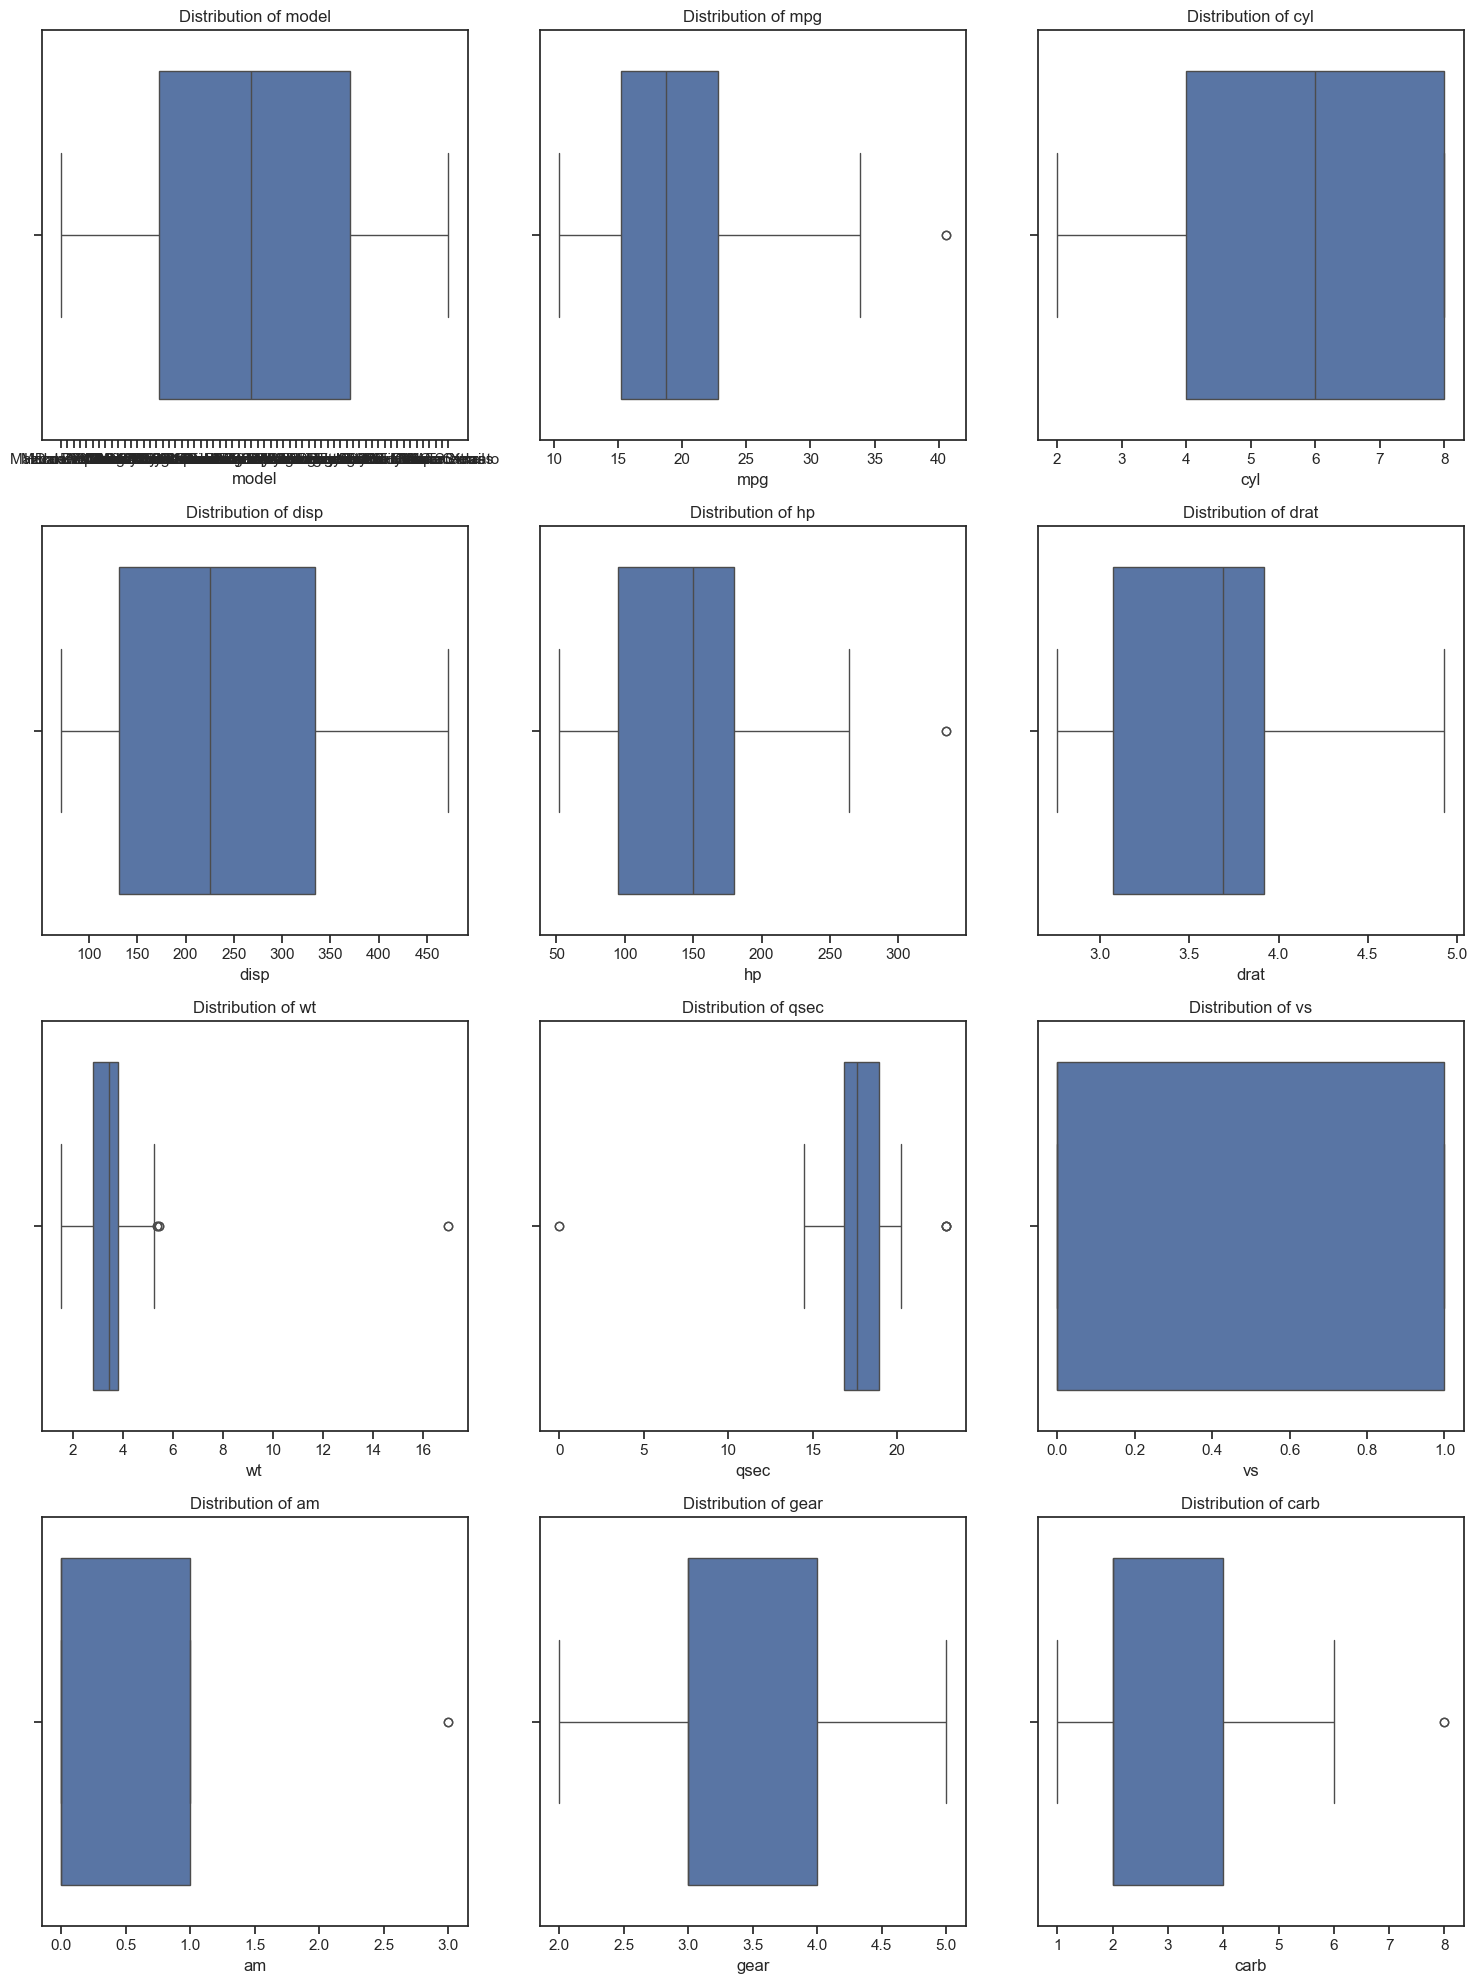

In [67]:
# Create a grid of distribution plots for each column
num_cols = len(dataset.columns)
num_rows = (num_cols + 1) // 3

# Create a grid of plots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

# Flatten the axes array
axes = axes.flatten()

# Loop through each column and create a distribution plot
for i, column in enumerate(dataset.columns):
    # sb.histplot(dataset[column], kde=True, ax=axes[i], stat="density")
    sb.boxplot(x=dataset[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Hide empty subplots
for j in range(num_cols, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

> **Answer**: There are outliers in the dataset. These can be clearly noticed from the distribution graphs of the following: **carb, wt, qsec, hp,** and **mpg**.

### 3. Check for normal distribution

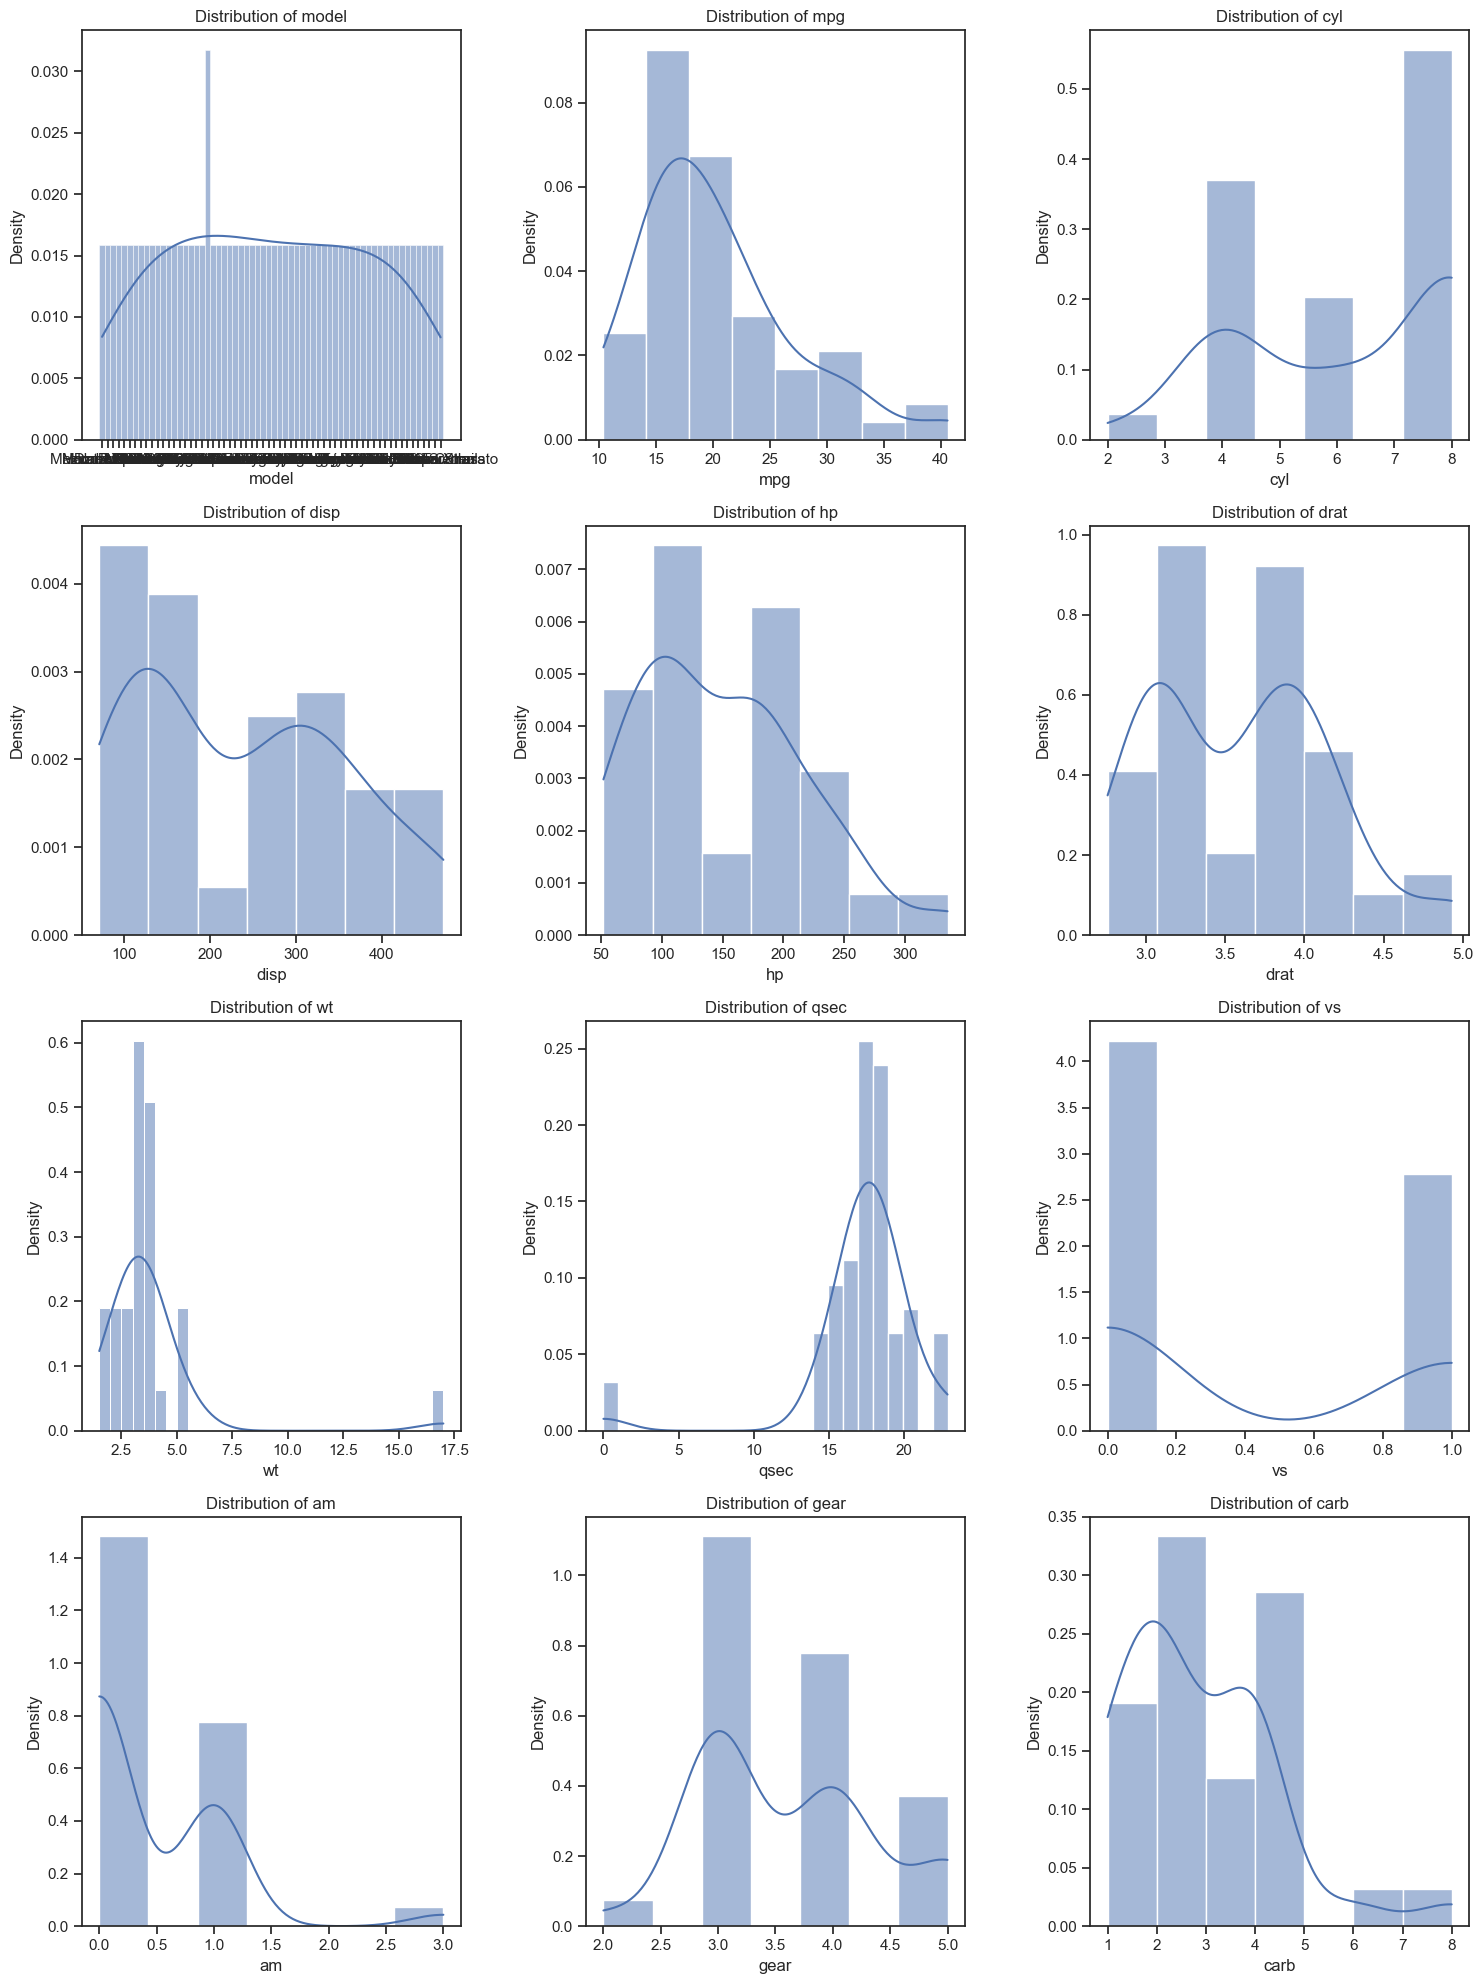

Variables that are not normally distributed: ['mpg', 'cyl', 'disp', 'wt', 'qsec', 'vs', 'am', 'carb', 'model']


In [68]:
# 3. Check for normal distribution

# Create a grid of distribution plots for each column
num_cols = len(dataset.columns)
num_rows = (num_cols + 1) // 3

# Create a grid of plots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

# Flatten the axes array
axes = axes.flatten()

# Loop through each column and create a distribution plot
for i, column in enumerate(dataset.columns):
    sb.histplot(dataset[column], kde=True, ax=axes[i], stat="density")
    axes[i].set_title(f'Distribution of {column}')

# Hide empty subplots
for j in range(num_cols, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# Alternative method for checking for normal distribution
non_normal_vars = []

for column in dataset.columns[1:]:
  if stats.normaltest(dataset[column])[1] < 0.05:
    non_normal_vars.append(column)
    
non_normal_vars.append(dataset.columns[0])
print('Variables that are not normally distributed:', non_normal_vars)

> **Answer**: All variables in the dataset are not normally distributed.

### 4. Descriptive statistics of continuous variables

In [73]:
continuous_vars = dataset.select_dtypes(include=['float64'])
continuous_vars.describe()


,mpg,disp,drat,wt,qsec
count,63.000000,63.000000,63.000000,63.000000,63.00000
mean,20.207937,234.887302,3.594286,3.758873,17.36127
std,6.755172,122.607423,0.558678,2.590846,3.71618
min,10.400000,71.100000,2.760000,1.513000,0.00000
25%,15.200000,130.900000,3.075000,2.780000,16.87000
50%,18.700000,225.000000,3.690000,3.440000,17.60000
75%,22.800000,334.000000,3.920000,3.780000,18.90000
max,40.600000,472.000000,4.930000,17.020000,22.90000


> **Answer**: The only continues variables in the dataset include: **mpg, disp, drat, wt,** and **qsec**.